In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %config InlineBackend.close_figures=False # keep figures open in pyplot

In [2]:
numval = 5
numseed = 5 
# ind 0: latent dim, ind 1: seed
psnr_dae = [[16.43, 17.38, 18.39, 19.11, 19.58],
            [16.42, 17.38, 18.41, 19.10, 19.67],
            [16.43, 17.40, 18.37, 18.86, 19.28],
            [16.44, 17.37, 18.46, 19.07, 19.37],
            [16.40, 17.41, 18.43, 18.89, 19.65]]

psnr_jae = [[16.72, 17.82, 19.35, 20.02, 20.41],
            [16.74, 17.83, 19.15, 20.17, 20.35],
            [16.72, 17.79, 19.29, 20.30, 20.34],
            [16.70, 17.78, 19.30, 20.01, 19.76],
            [16.65, 17.81, 19.28, 19.93, 19.46]]
psnr_ndpca = [[16.04, 17.46, 18.94, 19.28, 19.28],
              [16.07, 17.48, 19.04, 19.40, 19.40],
              [16.77, 17.46, 18.92, 19.37, 19.38],
              [16.18, 17.61, 19.29, 20.02, 20.02],
              [16.18, 17.61, 19.19, 19.51, 19.52]]
Z = [8, 16, 32, 48, 64]
Z1 = [[8, 16, 31, 42, 55],
      [8, 16, 31, 41, 52],
      [8, 16, 30, 39, 48],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53]]

# convert to numpy array and transpose
psnr_dae = np.array(psnr_dae).T
psnr_jae = np.array(psnr_jae).T
psnr_ndpca = np.array(psnr_ndpca).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
    for j in range(numseed):
      #   Z1[i, j] = int(Z[i] / 2)
        Z2[i, j] = Z[i] - Z1[i, j]
        # print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T    

In [3]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_dae)): ### latent dim
    for j in range(len(psnr_dae[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_dae[i, j], 'method': 'DAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_jae[i, j], 'method': 'JAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)

print(cifar_df.head())
print(cifar_df.tail())

   dpca_dim  Z1   Z2   psnr        method  seed
0         8   8  0.0  16.43           DAE     0
1         8   8  0.0  16.72           JAE     0
2         8   8  0.0  16.04  NDPCA (ours)     0
3         8   8  0.0  16.42           DAE     1
4         8   8  0.0  16.74           JAE     1
    dpca_dim  Z1    Z2   psnr        method  seed
70        64  64  11.0  19.76           JAE     3
71        64  64  11.0  20.02  NDPCA (ours)     3
72        64  64  11.0  19.65           DAE     4
73        64  64  11.0  19.46           JAE     4
74        64  64  11.0  19.52  NDPCA (ours)     4


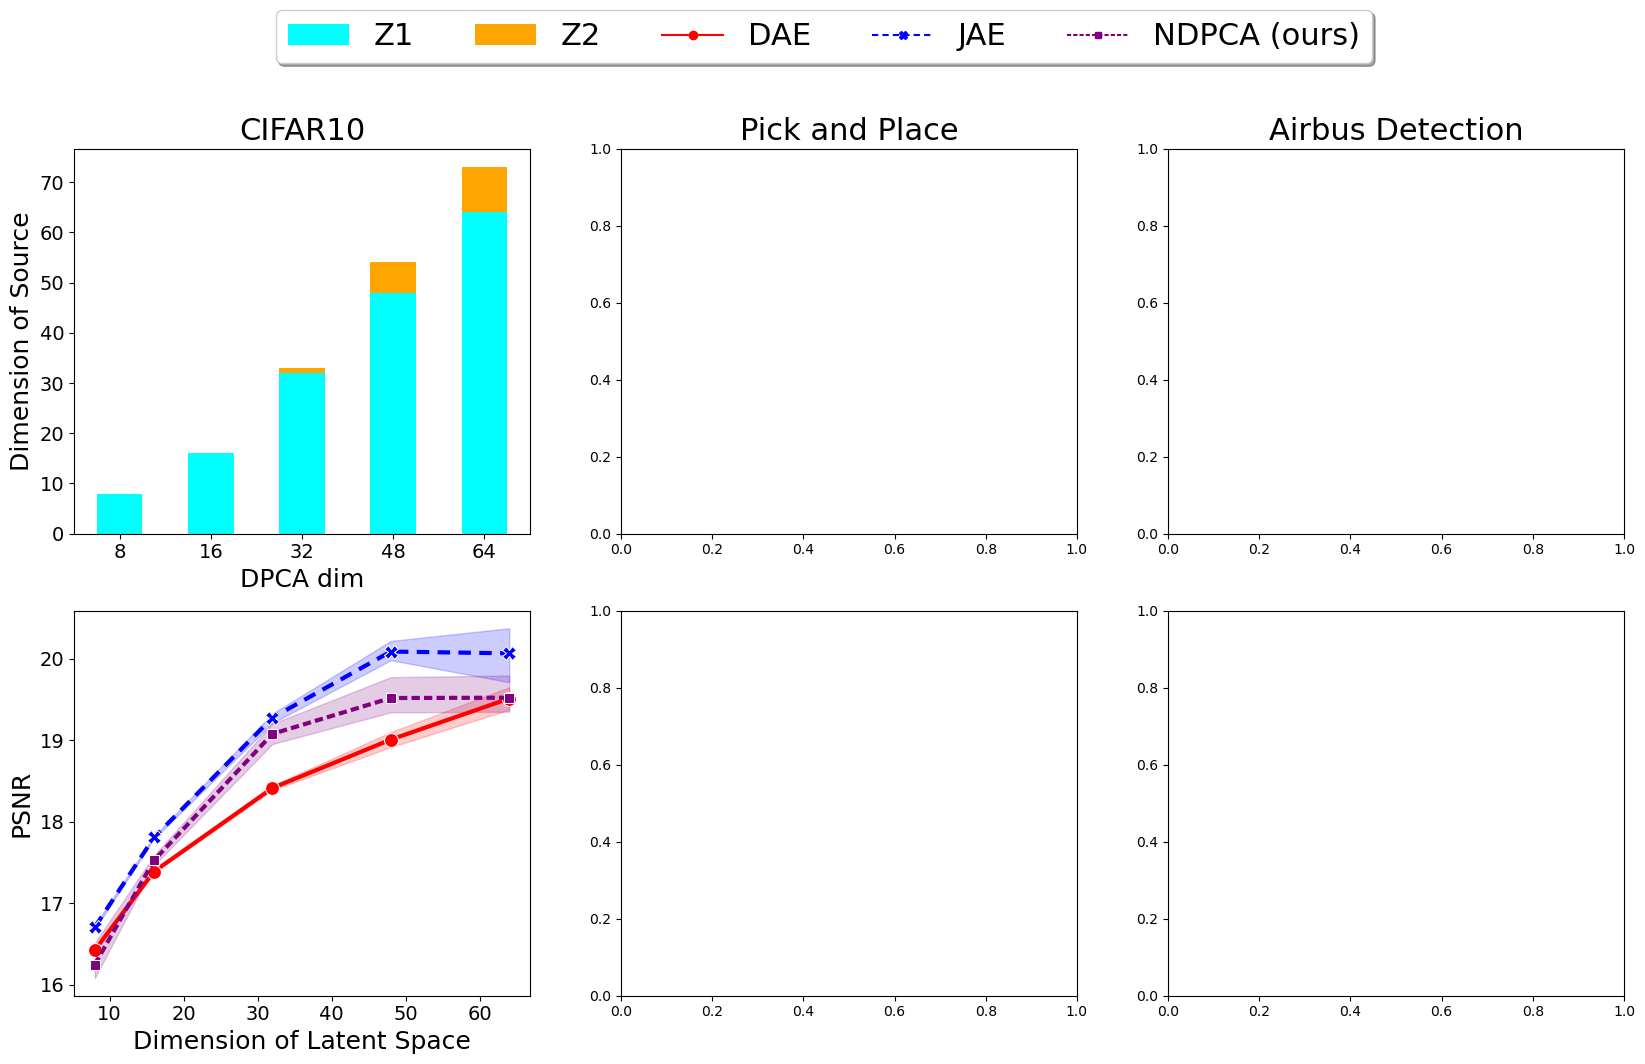

In [4]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(20, 11))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_z"].set_title("CIFAR10", fontsize=22)
ax_list["pnp_z"].set_title("Pick and Place", fontsize=22)
ax_list["airbus_z"].set_title("Airbus Detection", fontsize=22)


### plot cifar denoising

## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method',
                    palette=['red', 'blue', 'purple'], dashes=['', (3,2), (2,1)], style="method", markers=True, markersize=10)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=18)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=18)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=14)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=14)
ax_list["cifar_dpca"].legend().remove()

## plot Z1 and Z2
# select rows with dpca_dim == 8 and method == "NDPCA"
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('NDPCA') & (cifar_df["seed"] == 0) ]
cifar_df_z.plot(kind='bar', stacked=True, color=['aqua', 'orange'], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel("DPCA dim", fontsize=18)
ax_list["cifar_z"].set_ylabel("Dimension of Source", fontsize=18)
ax_list["cifar_z"].tick_params(axis="x", labelsize=14)
ax_list["cifar_z"].tick_params(axis="y", labelsize=14)
ax_list["cifar_z"].legend().remove()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes ]#[ax_list["cifar_dpca"], ax_list["cifar_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), fancybox=True, shadow=True, ncol=6, fontsize=22)
plt.show()